In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn import metrics, tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
raw_Dataset = pd.read_csv("train.csv")#, header=None, names=col_names
raw_TEST_Dataset = pd.read_csv("test.csv")

In [3]:
print(raw_Dataset.shape)
print(raw_Dataset.dtypes)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
raw_Dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
"""
pclass    Ticket class                                   1 = 1st, 2 = 2nd, 3 = 3rd
sibsp     # of siblings / spouses aboard the Titanic
parch     # of parents / children aboard the Titanic
embarked  Port of Embarkation                            C = Cherbourg, Q = Queenstown, S = Southampton  U = unknown

"""
#pre-processing
#Handling Missing Values
mean_age = raw_Dataset['Age'].mean()
mean_fare = raw_Dataset['Fare'].mean()
raw_Dataset['Age'] = raw_Dataset['Age'].replace(np.NaN, mean_age)
raw_Dataset['Embarked']= raw_Dataset['Embarked'].replace(np.NaN, 'U')


# for test dataSet
raw_TEST_Dataset['Age'] = raw_TEST_Dataset['Age'].replace(np.NaN, mean_age)
raw_TEST_Dataset['Fare'] = raw_TEST_Dataset['Fare'].replace(np.NaN, mean_fare)
raw_TEST_Dataset['Embarked']= raw_TEST_Dataset['Embarked'].replace(np.NaN, 'U')

In [7]:
#pre-processing
le = LabelEncoder()
raw_Dataset['Sex']= le.fit_transform(raw_Dataset['Sex']) 
raw_Dataset['Embarked']= le.fit_transform(raw_Dataset['Embarked']) 

# for test dataSet
raw_TEST_Dataset['Sex']= le.fit_transform(raw_TEST_Dataset['Sex']) 
raw_TEST_Dataset['Embarked']= le.fit_transform(raw_TEST_Dataset['Embarked']) 


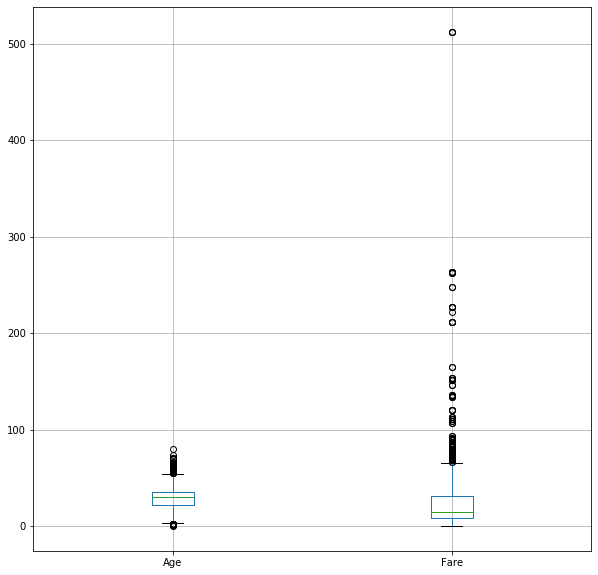

In [8]:
##we could see  many outliers in Age and Fare as shown below
fig = plt.figure(figsize=(10,10))
raw_Dataset.boxplot(column=['Age','Fare'])

In [9]:
Q1 = raw_Dataset.quantile(0.25)
Q3 = raw_Dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Sex              1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
Embarked         1.0000
dtype: float64


In [10]:
## seyting  the upper and lower bound based on IQR for outlier removal
age_lowerbound = Q1['Age'] - 1.5*IQR['Age']
age_upperbound =Q3['Age'] + 1.5*IQR['Age']
fare_lowerbound = Q1['Fare'] - 1.5*IQR['Fare']
fare_upperbound=Q3['Fare'] + 1.5*IQR['Fare']

In [11]:
raw_Dataset_updated = raw_Dataset[((raw_Dataset['Age']>age_lowerbound) & (raw_Dataset['Age']<age_upperbound))&((raw_Dataset['Fare']>fare_lowerbound) & (raw_Dataset['Fare']<fare_upperbound))]
print(raw_Dataset.shape)
print(raw_Dataset_updated.shape)

(891, 12)
(721, 12)


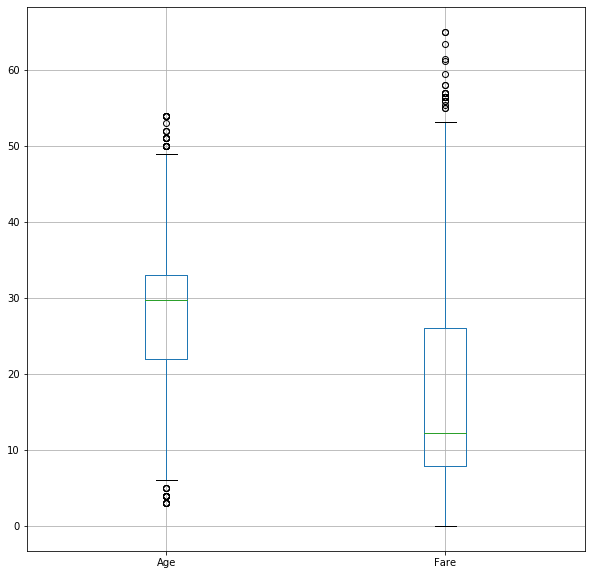

In [12]:
##outlier removal
fig = plt.figure(figsize=(10,10))
raw_Dataset_updated.boxplot(column=['Age','Fare'])

In [14]:
Dataset = raw_Dataset_updated
TEST_Dataset = raw_TEST_Dataset

In [15]:
#split dataset in features and target variable
feature_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = Dataset[feature_cols] # Features
y = Dataset.Survived # Target variable

# for test dataSet
Separate_TESTing = TEST_Dataset[feature_cols] # Features

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #70 30 ratio

# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 7)
clf_gini = tree.DecisionTreeClassifier(criterion="gini", max_depth = 7)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
clf_gini = clf_gini.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred_gini = clf_gini.predict(X_test)


print(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0]
Accuracy: 0.7695852534562212


In [17]:
print(y_pred_gini)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gini))

[1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0]
Accuracy: 0.7603686635944701


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[117  26]
 [ 24  50]]


In [19]:
from sklearn.metrics import f1_score

f_score=f1_score(y_test, y_pred)

In [20]:
f_score

0.6666666666666667

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision

0.6578947368421053

In [24]:
recall

0.6756756756756757

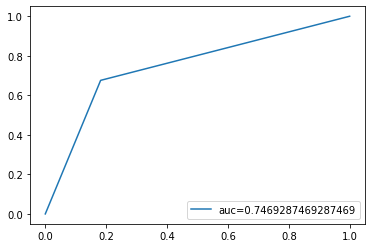

In [25]:
##ROC AUC plot
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [26]:
#for test dataset
#Separate test set with unknown labels.
user_pred = clf.predict(Separate_TESTing)

In [130]:
#output for test DataSet
print(user_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]


In [28]:
#for test dataset
import pandas as pd
predicted_value = pd.DataFrame(data=user_pred, columns=["Survived_prediction"])
OUTPUT = pd.concat([Separate_TESTing, predicted_value], axis=1)
OUTPUT.to_csv('OUTPUT_for_test_dataset.csv')
OUTPUT

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_prediction
0,3,1,34.500000,0,0,7.8292,1,0
1,3,0,47.000000,1,0,7.0000,2,0
2,2,1,62.000000,0,0,9.6875,1,0
3,3,1,27.000000,0,0,8.6625,2,0
4,3,0,22.000000,1,1,12.2875,2,1
...,...,...,...,...,...,...,...,...
413,3,1,29.699118,0,0,8.0500,2,0
414,1,0,39.000000,0,0,108.9000,0,1
415,3,1,38.500000,0,0,7.2500,2,0
416,3,1,29.699118,0,0,8.0500,2,0


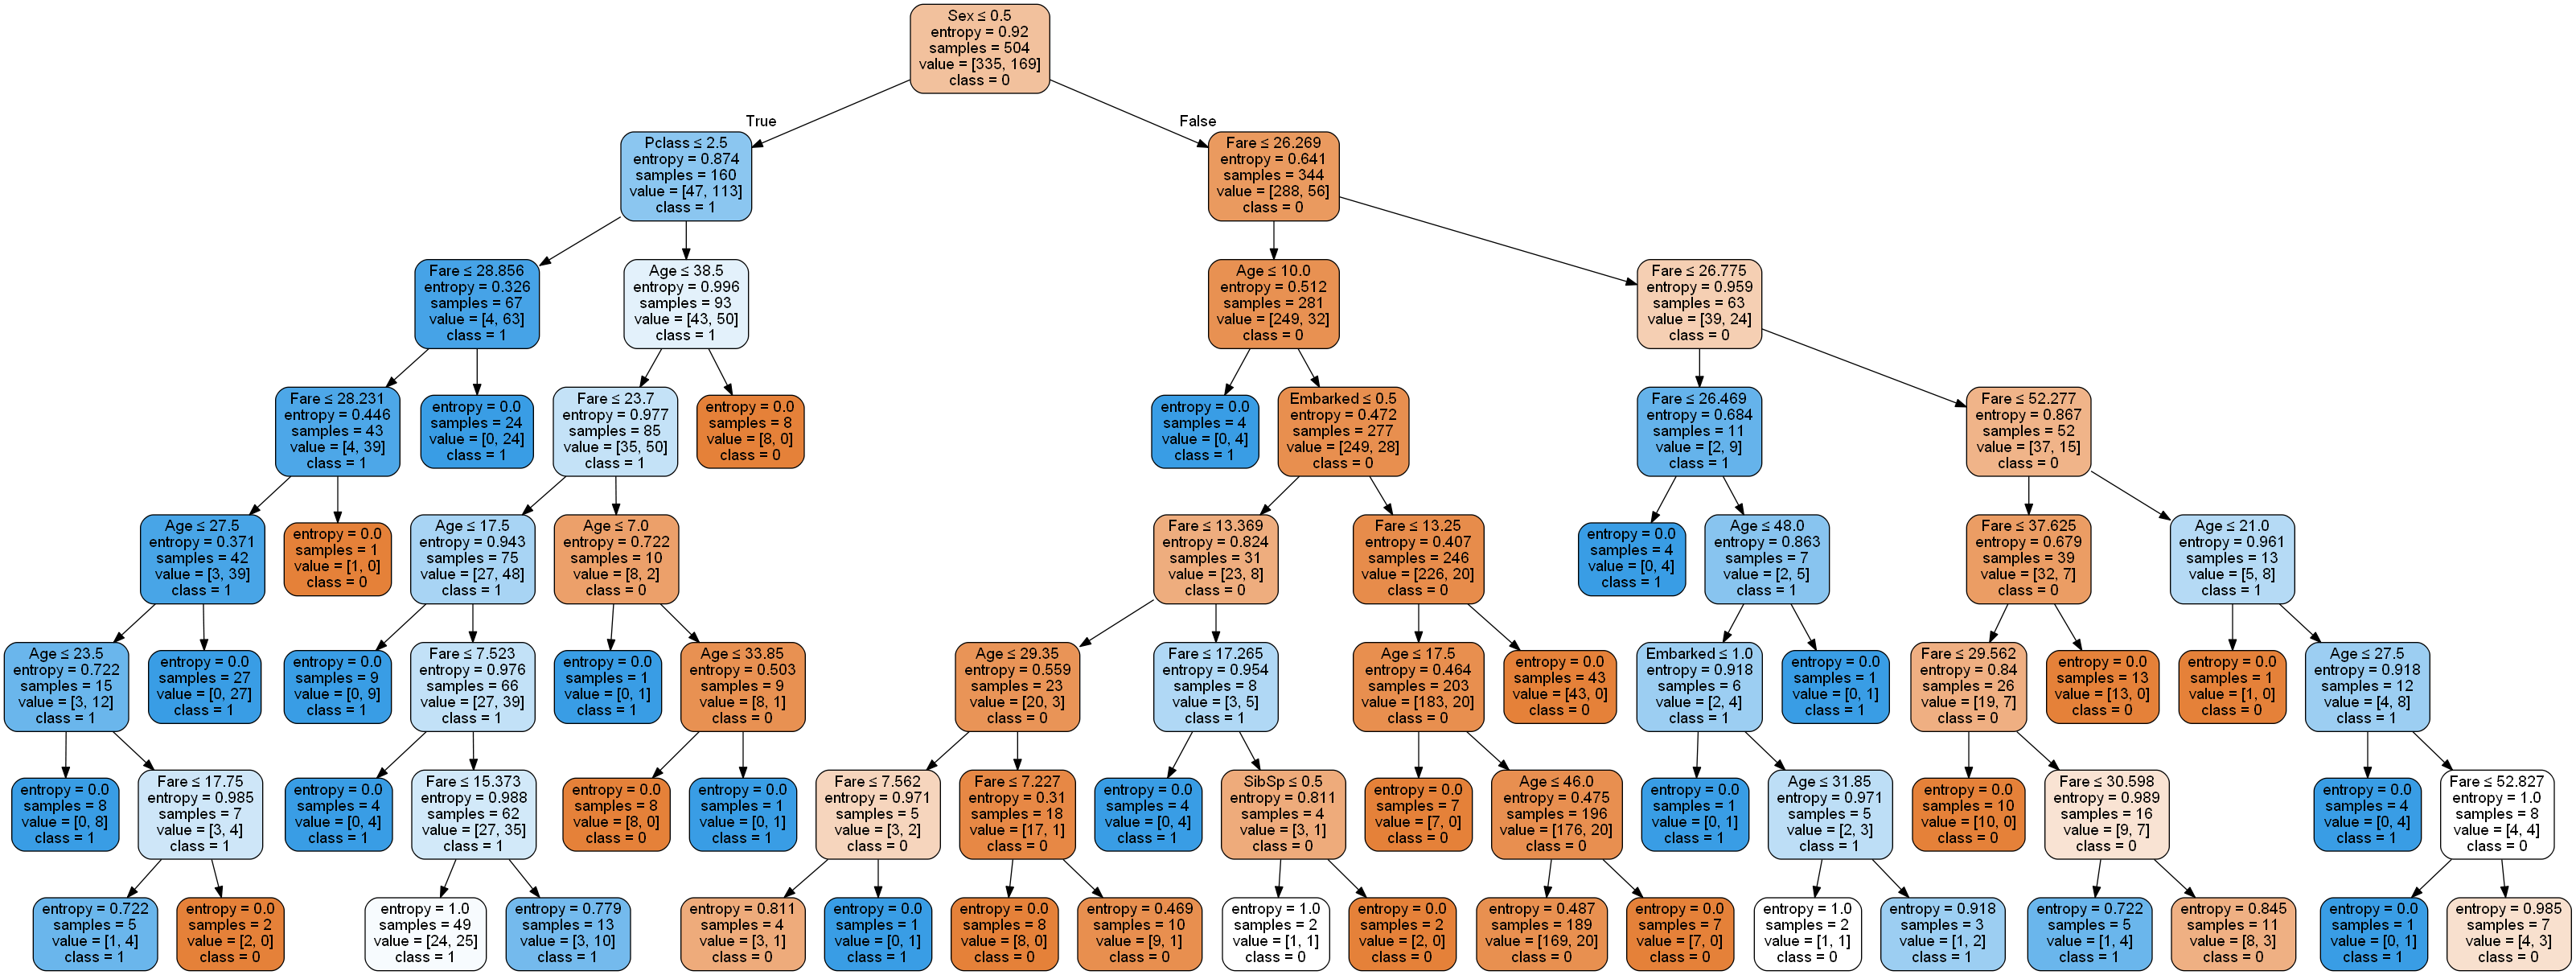

In [30]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [31]:
### Imporving our model by searching over the parameter space for which parameter combination gives best results

parameters = {'criterion':['gini','entropy'],'max_depth':list(np.arange(5,20))+[None],'min_samples_split':np.arange(0.01,0.25,0.01),'max_features':[2,3,4,5,6]}

In [32]:
from sklearn.model_selection import GridSearchCV
DTclf=tree.DecisionTreeClassifier()
clf = GridSearchCV(DTclf, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [

In [33]:
final_clf =clf.best_estimator_
final_clf.fit(X_train,y_train)
y_pred = final_clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.783410138248848